# $f_{1}^{´}$
# SPD Tests
# Different candidates for different target functions?
## luxpy together with emipr19nrm02

- management of target functions to work with luxpy (SMCF, f1prime, etc.)
- work with additional collections of responsivities

For our next more general work (extension to other target functions) we need
- All target functions integrated into the luxpy CMF **(done for BLH, $s_{\mathrm{mel}}$, V')**
- Extended sets of detector responsivities for the calculation **(done in a very first step)**
- A wide collection of SD to work with **(done for PT and Mono LEDs)**
- calculate some statistics for the characteristic values and their relation to SMCF and statistical quality parameters **(ToDo)**

In [3]:
from scipy import rand

# temp import only
from empir19nrm02.tools.help import strd, label_font_size, plot_cmf2, save_fig, get_target, label_management, \
    quantil, display_responsivity

#%run -i jhelp


import luxpy as lx
import numpy as np
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression

from empir19nrm02.f1prime import py_f1PrimeGlx
from empir19nrm02.tools import plotCorrMatrixSmall
%matplotlib inline
from luxpy import _CMF, plot_spectrum_colors
from luxpy.color.utils import plot_cmfs
from luxpy.toolboxes.photbiochem import _BLH, Km_correction_factor
from luxpy.toolboxes.photbiochem import _ACTIONSPECTRA_CIES026
from luxpy.toolboxes.indvcmf import add_to_cmf_dict

from empir19nrm02 import _SPD, _RES

print('Version of luxpy:', lx.__version__)
out_dir = 'SPD_Test'

Version of luxpy: v1.10.0


WindowsPath('E:/TTBV/Python/luxpy')

# What about other target functions?

**$V^{'}(\lambda)$** is already included in the CMF list (cieobs='1951_20_scotopic')

To add:
- **BLH** (from the photobiochem toolbox of luxpy to the _CMF)
- **$s_{\mathrm{mel}}$** (from the photobiochem toolbox ipRGC to the _CMF)

BLH


FileNotFoundError: [Errno 2] No such file or directory: 'SPD_Test\\FigBLH_function.svg'

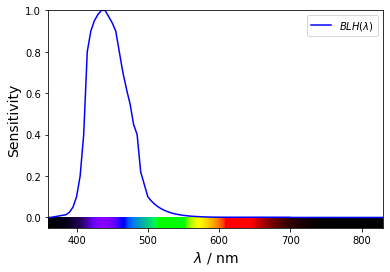

In [2]:
if 'BLH'  not in _CMF['types']:
    print( 'BLH')
    add_to_cmf_dict(bar=np.vstack((_BLH,_BLH[1],_BLH[1])), cieobs = 'BLH', K = 683, M = np.eye(3))
    plot_cmf2( name='BLH', cmf_symbols=['BLH'], cmf_colors = ['b-'],  single=True)
    save_fig( out_dir, 'BLH_function')

if 'SMEL'  not in _CMF['types']:
    print( 'SMEL')
    add_to_cmf_dict(bar=np.vstack((_ACTIONSPECTRA_CIES026[0],_ACTIONSPECTRA_CIES026[5],_ACTIONSPECTRA_CIES026[5],_ACTIONSPECTRA_CIES026[5])), cieobs = 'SMEL', K = 683*Km_correction_factor, M = np.eye(3))
    plot_cmf2( name='SMEL', cmf_symbols=['s_{\mathrm{mel}}'], cmf_colors = ['b-'],  single=True)
    save_fig( out_dir, 'SMEL_function')



# Plot all target functions

BTW: The other build in CMF (X,Y,Z) for different observers are also available

#### Remember: The first detector in every detector collection is the ideal detector.

In [ ]:
ax = plot_cmf2( name='1931_2', cmf_symbols=['V'], cmf_colors = ['g-'],  single=True)
plot_cmf2( ax=ax, name='1951_20_scotopic', cmf_symbols=['V^{´}'], cmf_colors = ['r-'],  single=True)
plot_cmf2( ax=ax, name='BLH', cmf_symbols=['BLH'], cmf_colors = ['b-'],  single=True)
plot_cmf2( ax=ax, name='SMEL', cmf_symbols=[strd['smel_e']], cmf_colors = ['b--'],  single=True)
save_fig( out_dir, 'target_all')

## Show the responsivities of new collections for color detectors (x,y and z) separately

* X,Y and Z Detectors

In [ ]:
_name = 'XDetectors'
_detectors=_RES[_name]['S']['data'].copy()
display_responsivity(_name, _detectors, cieobs='1931_2', s_target_index=1, out_dir=out_dir)

In [ ]:
_name = 'YDetectors'
_detectors=_RES[_name]['S']['data'].copy()
display_responsivity(_name, _detectors, cieobs='1931_2', s_target_index=2, out_dir=out_dir)

In [ ]:
_name = 'ZDetectors'
_detectors=_RES[_name]['S']['data'].copy()
display_responsivity(_name, _detectors, cieobs='1931_2', s_target_index=3, out_dir=out_dir)

# Other Detectors

* BLH
* VS
* SMEL(ipRGC)

#### Remember: The first detector in every detector collection is the ideal detector.


In [ ]:
_name = 'BLH'
_detectors=_RES[_name+'Detectors']['S']['data'].copy()
display_responsivity(_name, _detectors, cieobs=_name, out_dir=out_dir)

In [ ]:
_name = 'VS'
_detectors=_RES[_name+'Detectors']['S']['data'].copy()
display_responsivity(_name, _detectors, cieobs=_name, out_dir=out_dir)

In [ ]:
_name = 'SMEL'
_detectors=_RES[_name+'Detectors']['S']['data'].copy()
display_responsivity(_name, _detectors, cieobs=_name, out_dir=out_dir)

# CMF data base

What is included here (including the new once)?
* Show name
* Plot

In [ ]:
print('CMF data base:')
for cmf in _CMF['types']:
    print( cmf)
    if cmf == '1931_2':
        plot_cmf2()
        save_fig(out_dir, 'CMF_'+cmf)

# SPD data base

What is included here?
* Show name
* Plot selected SD
* plot the color values in a color diagram

In [ ]:
print('SPD data base:')
for spd, enable  in _SPD.items():
    print('Name:', spd, '\t\t\t', 'Size:', _SPD[spd]['S']['data'].shape[0]-1)
    _spectra=_SPD[spd]['S']['data'].copy()
    if spd is 'MONOLED':
        display_spectra( spd, _spectra, out_dir=out_dir)

# Summary

In [ ]:
print('CMF data base:')
for cmf in _CMF['types']:
    print('Name:', cmf)

print('\n SD data base:')
for spd, enable in _SPD.items():
    print('Name:', spd, '\t\t\t', 'Size:', _SPD[spd]['S']['data'].shape[0]-1)

print('\n Responsivity data base:')
for res, enable in _RES.items():
    print('Name:', res, '\t\t\t', 'Size:', _RES[res]['S']['data'].shape[0]-1)
